# Assemble Garcia & Keeling 2001 O$_2$ flux product

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os
from datetime import datetime

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import fgo2_gk2001

### Generate datasets

### Shifting and scaling
The recommended Garcia and Keeling rescaling is 0.82 
(Naegler 2006 vs. Wanninkhof 1992 scaling factors 0.32/0.39), plus a 10-day shift later, to allow for mixed layer equilibration.

In [35]:
ds = fgo2_gk2001.open_flux_dataset(shift_time=10., scaleby=0.82, clobber=True)
ds

<xarray.Dataset>
Dimensions:       (lat: 160, lon: 320, time: 12)
Coordinates:
  * lat           (lat) float64 -89.44 -88.31 -87.19 ... 87.19 88.31 89.44
  * lon           (lon) float64 -179.4 -178.3 -177.2 ... 177.2 178.3 179.4
  * time          (time) float64 26.0 55.5 85.0 115.5 ... 299.0 329.5 360.0
Data variables:
    area          (lat, lon) float64 1.536e+08 1.536e+08 ... 1.536e+08 1.536e+08
    date          (time) float64 2e+07 2e+07 2e+07 2e+07 ... 2e+07 2e+07 2e+07
    fgo2_ann      (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_sea      (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_thm_ann  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_thm_sea  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_bio_ann  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    fgo2_bio_sea  (time, lat, lon) float64 nan nan nan nan ... nan nan nan nan

Global sum: -0.1000 Tg/yr
Global sum: 0.8800 Tg/yr


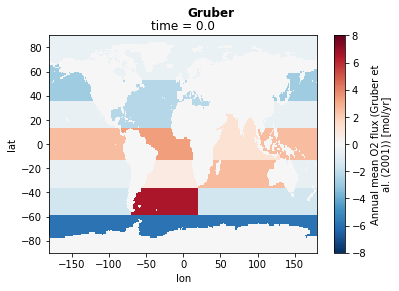

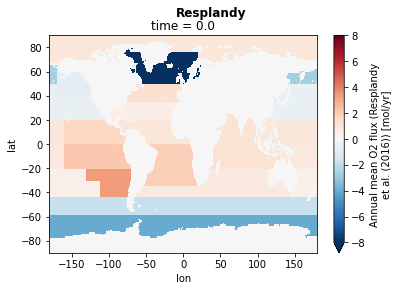

In [45]:
for product in ["Gruber", "Resplandy"]:
    fig = plt.figure()    
    ds = fgo2_gk2001.open_inversion_annual_flux(product, gk_grid=True)
    ds.fgo2.plot(vmin=-8., vmax=8., cmap='RdBu_r')
    fig.suptitle(product, fontweight="bold")    

### Make some quick plots of the fluxes

## Apply annual mean fluxes from Gruber et al. 2001 & Resplandy et al. 2016